# Capstone Project 1: Predict House Price Using Regression


#### Which features influence the price of a home and is it possible to predict a price given certain variables?




From the basis of my preconceived thoughts I would assume these features would influence price in a positive way.
- more rooms (bedrooms, bathrooms)
- larger area (sqft_living, sqft_lot, floors)
- if it has a waterfront
- if it was renovated
- higher grade 



### Data Wrangling:

Data Science is an iterative process. This means the workflow is non-linear, iterative process. While exploring one aspect of our dataset we may need to go back and change some other aspect of our data.

Data Wrangling, also known as data munging is the process of transforming and mapping our data. This includes both, getting the data stage and exploring the data stage. The exploring step also includes creating data visualization to better understand the data.

Before performing analysis or running algorithms, we need to collect, clean, and transform messy data to create usable data. To set up our environment we first need to import the modules and read the data. The data is a currently in a csv file downloaded from kaggle. I will read the file into my notebook by using the module pandas.(Pandas is the standard tool for data scientist in Python for cleaning and manipulating data) 



### Import packages 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in csv file into a pandas dataframe

In [100]:
df = pd.read_csv('kc_house_data.csv')

### Explore initial dataframe

Lets explore our current dataframe. Using .head() we can get an visualization of our dataset in a table format. Each row indicating a house(observation) with each column indicating a feature. We will aso use .info() and .describe() to get a better understanding of our data. 
    
-  .head() shows the first 5 observations. 
-  .info() will inform us of any missing data, while also giving us the number of rows, columns, and datatypes for each feature. 
-  .describe() will give us a summary statistic of each numeric feature. This is a great way to get an overall feel of our dataset, if we have an outliers this method is useful in showing us this. 

In [101]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


From observing our dataset using .info() we can see we have 21613 observations(rows) and 21 features(columns). There is no missing values indicated by the 2nd column number showing each feature having the same number of observations. The last column indicates datatype, We may want to change datatypes of some columns, like grade into categorical. If any change is needed it will be done in our exploratory data analysis. 

In [103]:
df.isna().sum() #indicates no nan values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Many of these features can be categorical (condition, grade, view,waterfront) 

In [104]:
df.waterfront.unique()

array([0, 1])

In [105]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [106]:
df.grade.unique() #what is the scale? 

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [107]:
df.view.unique() # has been viewed, would be binary. does this indicate the number of times a house has been viewd?

array([0, 3, 4, 2, 1])

In [108]:
df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')

In [109]:
df.id=df.id.astype('str')

In [110]:
df.grade.value_counts() # after further research the grading system is out of 13.
df.grade = df.grade.astype('category')

In [111]:
df.view.value_counts() # we can analyze if houses cost more if it was viewed more times
df.view = df.view.astype('category')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null object
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null category
view             21613 non-null category
condition        21613 non-null category
grade            21613 non-null category
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: category(4), float64(5), int64(10), object(2)
memory usage: 2

In [113]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'])

In [114]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [388]:
df.id.value_counts() # are some houses counted twice?
df[df.id == '795000620'] # confirms some observations are recorded more than once
df[df.id == '1250201165'] 
df.drop_duplicates(subset='id', keep='first', inplace=True)
df.id.value_counts() #confims all duplicates dropped

3213200180    1
5468730280    1
2011400583    1
8944460030    1
4036800370    1
3790700070    1
7237550130    1
3832711040    1
7853301220    1
2734101055    1
2114700530    1
7732410420    1
3211230260    1
6705120100    1
826069016     1
6909700340    1
7853301560    1
7683800192    1
9201000030    1
7625704510    1
4141010050    1
2880100160    1
8947800080    1
9287801150    1
7853360470    1
3330500075    1
4178500100    1
859000160     1
3526039160    1
6052401215    1
             ..
1772600510    1
1574100025    1
11501310      1
8141310180    1
2968801605    1
4206901435    1
603001050     1
4310700570    1
7856410020    1
1972201964    1
1489300005    1
6150200005    1
3295950240    1
2597000006    1
4435600330    1
9542830430    1
5153200030    1
1887500045    1
1383500070    1
7502800050    1
2767604170    1
2938100005    1
3225069239    1
3277801580    1
6400700389    1
3885801190    1
1771000960    1
889000015     1
4024101670    1
5495200040    1
Name: id, Length: 21436,

### Descriptive Statstics 

lets get a quick summary of the numeric columns of our dataset

In [389]:
df.describe() #Immediately notice 33 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.143600e+04,21436.000000,21436.000000,21436.000000,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,5.405293e+05,3.371571,2.117349,2082.704936,1.513564e+04,1.496198,1790.960440,291.744495,1971.098433,84.729800,98077.862288,47.560156,-122.213697,1988.314378,12785.961280
std,3.676893e+05,0.929205,0.769913,919.146469,4.153862e+04,0.540388,829.026491,442.781983,29.385277,402.431012,53.469371,0.138601,0.140896,685.699093,27375.467469
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.221500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069625e+04,2.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


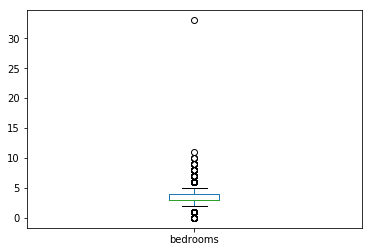

In [117]:
df['bedrooms'].plot(kind='box') #outlier indicating a row that has 33 bedrooms


In [392]:
df = df[df['bedrooms']<33]
df.head()
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.143500e+04,21435.000000,21435.000000,21435.000000,2.143500e+04,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000
mean,5.405246e+05,3.370189,2.117366,2082.726522,1.513606e+04,1.496221,1790.995475,291.731047,1971.099557,84.733753,98077.861115,47.560150,-122.213692,1988.345090,12786.338512
std,3.676972e+05,0.906920,0.769927,919.162476,4.153954e+04,0.540390,829.029961,442.787935,29.385501,402.439983,53.470342,0.138602,0.140897,685.700345,27376.050345
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.221000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069650e+04,2.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


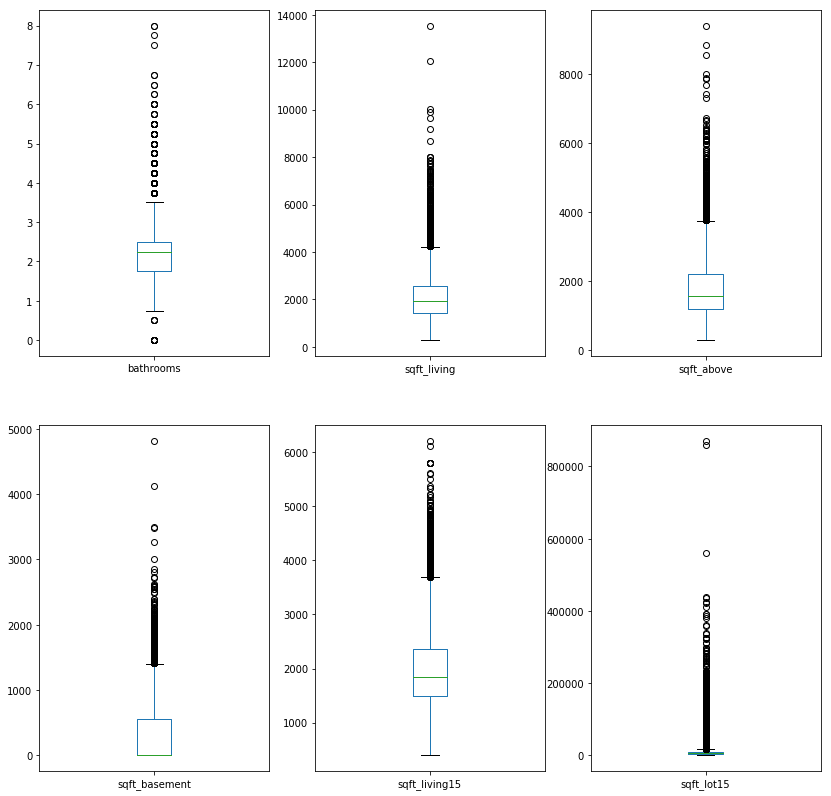

In [393]:
fig, axes = plt.subplots(nrows=2, ncols = 3,figsize = (14,14))


df['bathrooms'].plot(kind='box', ax=axes[0,0])
df['sqft_living'].plot(kind='box', ax=axes[0,1])
df['sqft_above'].plot(kind='box', ax=axes[0,2])
df['sqft_basement'].plot(kind='box', ax=axes[1,0])
df['sqft_living15'].plot(kind='box', ax=axes[1,1])
df['sqft_lot15'].plot(kind='box', ax=axes[1,2])

                         

From the boxplots we can see that there are an abundent of data that can be considered outliers, however unlike in the bedrooms columns (which was only 1 value) we should not delete the observation as it may impact our data. We may get more insight in our data visualization section of our project.

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21436 entries, 0 to 21612
Data columns (total 21 columns):
id               21436 non-null object
date             21436 non-null datetime64[ns]
price            21436 non-null float64
bedrooms         21436 non-null int64
bathrooms        21436 non-null float64
sqft_living      21436 non-null int64
sqft_lot         21436 non-null int64
floors           21436 non-null float64
waterfront       21436 non-null category
view             21436 non-null category
condition        21436 non-null category
grade            21436 non-null category
sqft_above       21436 non-null int64
sqft_basement    21436 non-null int64
yr_built         21436 non-null int64
yr_renovated     21436 non-null int64
zipcode          21436 non-null int64
lat              21436 non-null float64
long             21436 non-null float64
sqft_living15    21436 non-null int64
sqft_lot15       21436 non-null int64
dtypes: category(4), datetime64[ns](1), float64(5), int64(10)

## Data Visualization and Data Storytelling 

### Some further exploration

My initial thoughts on features and price:
- more rooms (bedrooms, bathrooms)
- larger area (sqft_living, sqft_lot, floors)
- if it has a waterfront
- if it was renovated
- higher grade

lets do some exploratory analysis and plot to see if my above assumptions hold value

In [120]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


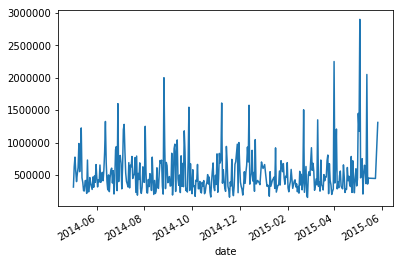

In [121]:
df.groupby(['date'])['price'].first().plot(kind='line') #prices increasing gradually?
#not a feature so may not need date column for our analysis/model

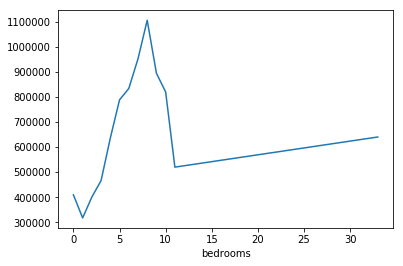

In [122]:
df.groupby('bedrooms')['price'].mean().plot(kind = 'line') #bedrooms compared to avg price

#### From the above graph, 8 bedroom homes on average have the highest price.

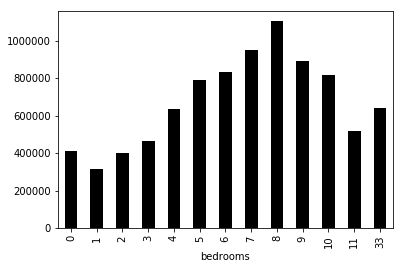

In [123]:
df.groupby('bedrooms')['price'].mean().plot(kind = 'bar',color = 'black')

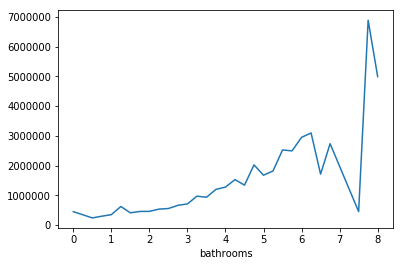

In [124]:
df.groupby('bathrooms')['price'].mean().plot(kind = 'line') #initial exploration of bathrooms

#### Average price increase with bathrooms

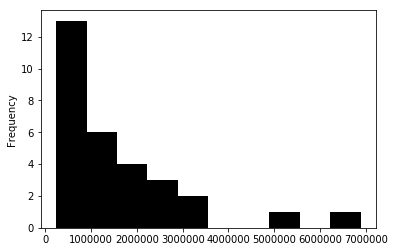

In [125]:
df.groupby('bathrooms')['price'].mean().plot(kind = 'hist',color = 'black')

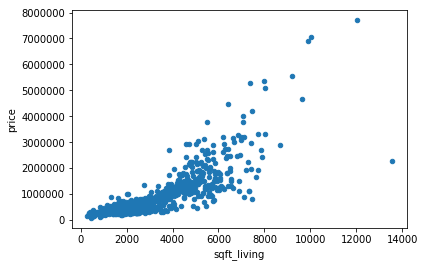

In [126]:
dfaps = df.groupby('sqft_living',as_index=False)['price'].mean()

dfaps.head()
dfaps.plot(kind='scatter',x='sqft_living',y='price') #sqft_living compared to average price

#### From the above chart there seem to be a correlation with sqft_living and average price

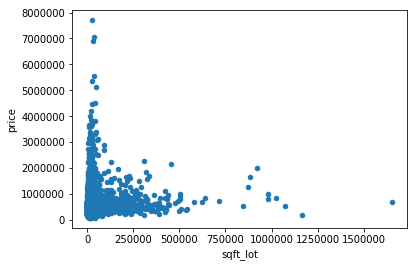

In [127]:
dfapsl = df.groupby('sqft_lot',as_index=False)['price'].mean()

dfaps.head()
dfapsl.plot(kind='scatter',x='sqft_lot',y='price') #sqft_lot compared to average price


no real correlation between sqft_lot and average price

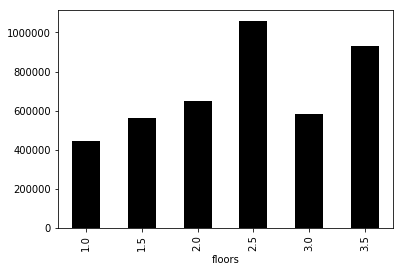

In [128]:
df.groupby('floors')['price'].mean().plot(kind = 'bar',color = 'black')

#### 2.5 floors has the highest average price

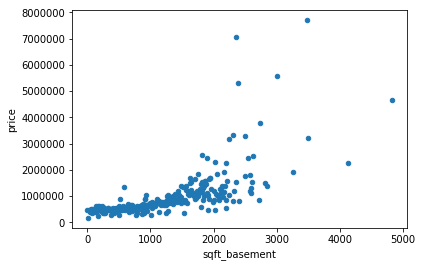

In [129]:
dfapb = df.groupby('sqft_basement',as_index=False)['price'].mean()

dfapb.head()
dfapb.plot(kind='scatter',x='sqft_basement',y='price')

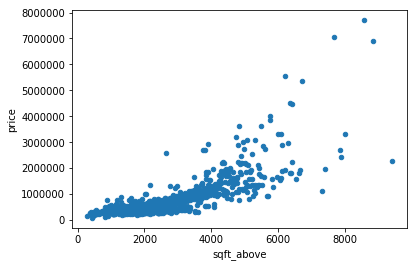

In [130]:
dfapa = df.groupby('sqft_above',as_index=False)['price'].mean()

dfapa.head()
dfapa.plot(kind='scatter',x='sqft_above',y='price')

Both sqft_basement and above have a somewhat positive correlation with average price

In [131]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Renovated Vs Non-Renovated Homes

Lets check if prices are higher for homes that had been renovated compared to none renovated. (and check if homes with waterfront has higher value than homes without) 

From our dataset our waterfront column is already a categorical data type with 0 indicating no waterfront and 1 indicating it has a waterfront. I will be creating a new column renovated which will indicate if a home has been renovated or not. 



In [132]:
df['renovated'] = np.where(df['yr_renovated']==0, 'No', 'Yes')
df.renovated.value_counts()

No     20526
Yes      910
Name: renovated, dtype: int64

In [133]:
df['renovated'] = df.renovated.astype('category') #created category datatype 

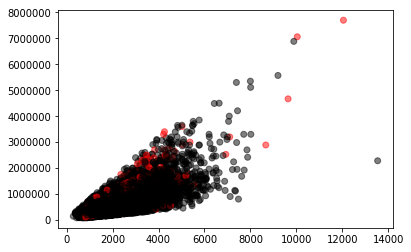

In [134]:
colors = {'Yes': 'red', 'No':'black'}
plt.scatter(x=df['sqft_living'], y=df['price'], c = df['renovated'].apply(lambda x:colors[x]),alpha = .5)



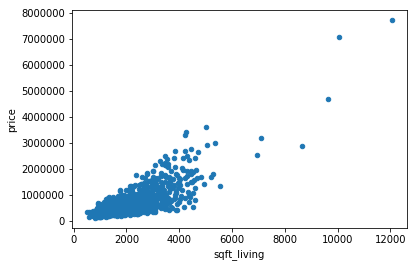

In [135]:
dfreno = df[df['renovated'] == 'Yes']
dfreno.plot(kind = 'scatter', x = 'sqft_living', y ='price')

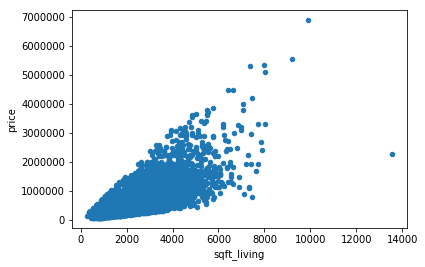

In [136]:
dfnotreno = df[df['renovated'] == 'No']
dfnotreno.plot(kind = 'scatter', x = 'sqft_living', y ='price')

In [137]:
dfreno.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.100000e+02,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,7.617185e+05,3.451648,2.302473,2321.993407,16662.528571,1.510440,1879.782418,442.210989,1939.556044,1995.898901,98094.195604,47.579350,-122.259695,1979.346154,13817.997802
std,6.085942e+05,1.037987,0.890178,1085.407106,38105.400551,0.494915,849.488863,543.001372,22.663042,15.500122,54.740202,0.122624,0.131707,703.978337,26926.828309
min,1.100000e+05,1.000000,0.750000,520.000000,1024.000000,1.000000,520.000000,0.000000,1900.000000,1934.000000,98001.000000,47.196000,-122.511000,828.000000,1281.000000
25%,4.021250e+05,3.000000,1.750000,1554.750000,5000.000000,1.000000,1270.000000,0.000000,1920.000000,1987.000000,98040.000000,47.517850,-122.356000,1460.000000,5040.000000
50%,6.000000e+05,3.000000,2.250000,2200.000000,7500.000000,1.500000,1740.000000,145.000000,1942.000000,2000.000000,98112.000000,47.600050,-122.291000,1840.000000,7500.000000
75%,9.000000e+05,4.000000,2.750000,2880.000000,13064.500000,2.000000,2290.000000,820.000000,1955.000000,2007.000000,98126.000000,47.671775,-122.206250,2350.000000,11367.750000
max,7.700000e+06,11.000000,8.000000,12050.000000,478288.000000,3.000000,8570.000000,4820.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,310582.000000


In [138]:
dfnotreno.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.052600e+04,20526.000000,20526.000000,20526.000000,2.052600e+04,20526.000000,20526.000000,20526.000000,20526.000000,20526.0,20526.000000,20526.000000,20526.000000,20526.000000,20526.000000
mean,5.307231e+05,3.368021,2.109142,2072.096317,1.506794e+04,1.495567,1787.022605,285.073711,1972.496833,0.0,98077.138166,47.559305,-122.211658,1988.711975,12740.206957
std,3.500295e+05,0.923953,0.763129,909.648366,4.168384e+04,0.542319,827.908209,436.625464,28.861137,0.0,53.297940,0.139209,0.140945,684.892276,27394.932972
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.0,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.043000e+03,1.000000,1190.000000,0.000000,1953.000000,0.0,98032.000000,47.468300,-122.326000,1490.000000,5100.000000
50%,4.480875e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,1560.000000,0.000000,1977.000000,0.0,98065.000000,47.570700,-122.226000,1840.000000,7620.000000
75%,6.350000e+05,4.000000,2.500000,2540.000000,1.061650e+04,2.000000,2210.000000,540.000000,1998.000000,0.0,98117.000000,47.678300,-122.122000,2370.000000,10050.000000
max,6.885000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4130.000000,2015.000000,0.0,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [139]:
dfreno['price'].mean()

761718.4978021978

In [140]:
dfnotreno['price'].mean()

530723.0813115074

In [141]:
dfreno['price'].mean() - dfnotreno['price'].mean()

230995.41649069043

In [142]:
(dfreno['price'].mean() - dfnotreno['price'].mean())/ dfnotreno['price'].mean()

0.4352465996388574

#### Houses that were renovated are $231,000 more than houses that were not renovated (on average). Thats about 43% more.

### Waterfront vs Non-Waterfront Homes

In [143]:
dfwater = df[df['waterfront'] == 1]
dfnowater = df[df['waterfront']== 0]

In [144]:
dfwater.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1,2,...,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,No
230,8096000060,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1,4,...,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193,Yes
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1,4,...,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841,No
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1,4,...,760,0,1936,0,98070,47.4683,-122.438,1230,14267,No
300,3225069065,2014-06-24,3075000.0,4,5.00,4550,18641,1.0,1,4,...,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508,No


In [145]:
df.waterfront.value_counts()

0    21273
1      163
Name: waterfront, dtype: int64

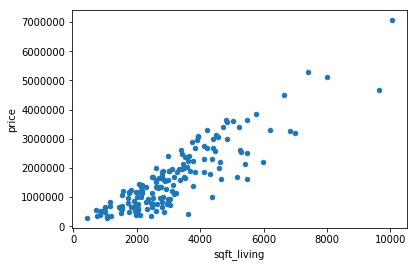

In [146]:
dfwater.plot(kind = 'scatter', x = 'sqft_living', y ='price')

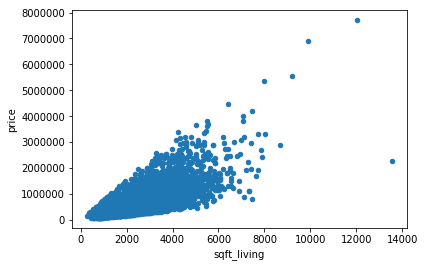

In [147]:
dfnowater.plot(kind = 'scatter', x = 'sqft_living', y ='price')

In [148]:
dfwater.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1.661876e+06,3.300613,2.677914,3173.687117,25371.828221,1.641104,2473.042945,700.644172,1962.190184,512.392638,98096.527607,47.537364,-122.281601,2666.349693,22385.104294
std,1.120372e+06,1.078035,1.092456,1606.025093,42944.334119,0.554191,1240.439072,792.919972,27.877056,872.405490,59.705586,0.115622,0.124015,823.243364,22589.013566
min,2.850000e+05,1.000000,0.750000,440.000000,1767.000000,1.000000,440.000000,0.000000,1903.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,2433.000000
25%,7.600000e+05,3.000000,2.000000,2060.000000,10851.000000,1.000000,1570.000000,0.000000,1940.500000,0.000000,98040.000000,47.451200,-122.376500,2080.000000,11715.000000
50%,1.400000e+06,3.000000,2.500000,2850.000000,17342.000000,2.000000,2180.000000,500.000000,1960.000000,0.000000,98075.000000,47.539500,-122.277000,2660.000000,15959.000000
75%,2.215000e+06,4.000000,3.250000,3905.000000,26408.000000,2.000000,3085.000000,1245.000000,1986.500000,1959.000000,98155.000000,47.606800,-122.210000,3140.000000,24765.000000
max,7.062500e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,7680.000000,4820.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


In [149]:
dfnowater.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.127300e+04,21273.000000,21273.000000,21273.000000,2.127300e+04,21273.000000,21273.000000,21273.000000,21273.000000,21273.000000,21273.000000,21273.000000,21273.000000,21273.000000,21273.000000
mean,5.319372e+05,3.372115,2.113054,2074.345508,1.505721e+04,1.495088,1785.734123,288.611385,1971.166690,81.452922,98077.719269,47.560331,-122.213177,1983.119071,12712.409815
std,3.419985e+05,0.927981,0.765371,906.901547,4.151897e+04,0.540145,822.946522,437.583209,29.386733,394.947195,53.395158,0.138751,0.140894,681.964068,27396.373428
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.750000,1422.000000,5.027000e+03,1.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.471400,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.582000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572500,-122.229000,1840.000000,7600.000000
75%,6.400000e+05,4.000000,2.500000,2540.000000,1.057800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.124000,2360.000000,10026.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [150]:
dfwater['price'].mean()

1661876.0245398772

In [151]:
dfnowater['price'].mean()

531937.1977624218

In [152]:
dfwater['price'].mean() - dfnowater['price'].mean()

1129938.8267774554

In [153]:
(dfwater['price'].mean() - dfnowater['price'].mean())/dfnowater['price'].mean()

2.124195922997132

#### Homes with waterfronts are around $1,130,000 more over homes that do not have waterfronts on average. That is around about 212% more. 

In [154]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


### Condition And Grade

In [155]:
df.condition.unique()

[3, 5, 4, 1, 2]
Categories (5, int64): [3, 5, 4, 1, 2]

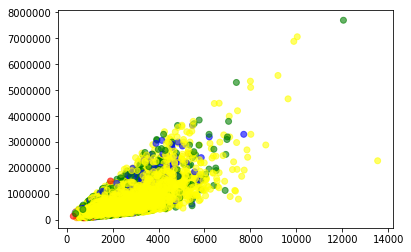

In [156]:
colors = {1: 'red', 2:'orange',3:'yellow',4:'green',5:'blue'}
plt.scatter(x=df['sqft_living'], y=df['price'], c = df['condition'].apply(lambda x:colors[x]),alpha = .6)


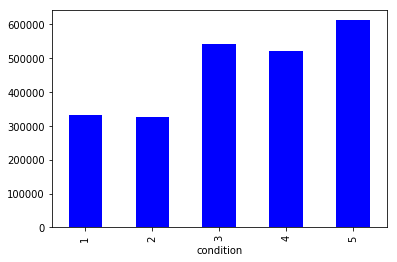

In [157]:
df.groupby('condition')['price'].mean().plot(kind = 'bar',color = 'blue')

#### Conditions of 3,4,5 are best on price (average). Homes of condition 5 holding the most value.

In [158]:
df.groupby('condition')['price'].mean()

condition
1    330618.965517
2    324661.213415
3    542625.328661
4    521470.884677
5    611611.926497
Name: price, dtype: float64

In [159]:
df.price.mean() #average price of a house in our dataset

540529.2871804441

In [160]:
percent_diff = []
for avg_price in df.groupby('condition')['price'].mean():
    percent_diff.append(avg_price/df.price.mean())

In [161]:
percent_diff

[0.6116578201374523,
 0.6006357492822642,
 1.003877757468539,
 0.9647412213255767,
 1.1315056205133363]

#### From my calculations homes with condition 1 and 2 are around 40% less on average than the average price of a house in our dataset, a home with condition 3 is around the same, a condition of 4 is about 4% less than the average and a house with condition 5 is about 13% higher than the average price.
- condition 1: -38% 
- condition 2: -40%
- condition 3: 0%
- condition 4: -4%
- condition 5: 13%

From this analysis, homes with condition 5 are slightly more (based on average price). 

In [162]:
df.grade.unique()

[7, 6, 8, 11, 9, ..., 12, 4, 3, 13, 1]
Length: 12
Categories (12, int64): [7, 6, 8, 11, ..., 4, 3, 13, 1]

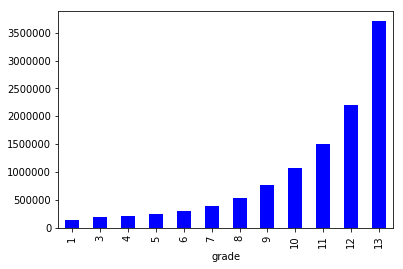

In [163]:
df.groupby('grade')['price'].mean().plot(kind = 'bar',color = 'blue')

This graph what I expected the relationship of the cost and price to be. Better grade will be a higher price. I would like to point out there is no grade of 2.

In [164]:
df.groupby('grade')['price'].mean()

grade
1     1.420000e+05
3     2.056667e+05
4     2.143810e+05
5     2.474955e+05
6     3.016267e+05
7     4.020437e+05
8     5.427935e+05
9     7.731328e+05
10    1.071449e+06
11    1.497904e+06
12    2.202359e+06
13    3.709615e+06
Name: price, dtype: float64

In [165]:
df.price.mean()

540529.2871804441

In [166]:
percent_diff_grade = []
for avg_price in df.groupby('grade')['price'].mean():
    percent_diff_grade.append(avg_price/df.price.mean())

In [167]:
percent_diff_grade

[0.2627054691906016,
 0.3804912546727727,
 0.3966131707701383,
 0.4578762390193966,
 0.5580210192361083,
 0.7437963776745752,
 1.0041888558235068,
 1.4303253895298853,
 1.9822211445560483,
 2.771179461716875,
 4.074449577618329,
 6.862931338958159]

#### Grade 8 is the cut off for average prices of homes in our dataset. Therefore any grade above a 8 will yield a better price on average and any grade under 8 will have a lower price on average. The outcomes are:
- grade 1: 74% lower on average
- grade 3: 62% lower on average
- grade 4: 61% lower on average
- grade 5: 54% lower on average
- grade 6: 45% lower on average
- grade 7: 36% lower on average
- grade 8: 0%
- grade 9: 43% higher on average 
- grade 10: 98% higher on average
- grade 11: 277% higher on average
- grade 12: 406% higher on average 
- grade 13: 686% higher on average


In [168]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


## Visualizing each feature

### Date 

In [169]:
import datetime as dt

In [170]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


In [93]:
dfdate = df[['date', 'price']].copy()


In [309]:
dfdate['month'] = df['date'].dt.month

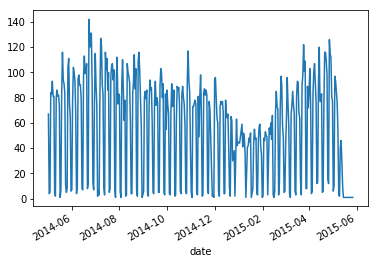

In [179]:
dfdate.groupby('date')['price'].count().plot()

#### There seems to be a slight dip from the amount of houses sold between 2014-12 and 2015-03(indicating the end of the year and beginning of a new year. Are house price cheaper between these dates than the other times? 

In [268]:
dfdateless = dfdate[(dfdate['date'] >= '2014-12') & (dfdate['date'] < '2015-03')]

In [269]:
dfdateless.head()

,date,price
1,2014-12-09,538000.0
2,2015-02-25,180000.0
3,2014-12-09,604000.0
4,2015-02-18,510000.0
7,2015-01-15,291850.0


In [270]:
dfdateless.head().describe()

,price
count,5.000000
mean,424770.000000
std,180130.964856
min,180000.000000
25%,291850.000000
50%,510000.000000
75%,538000.000000
max,604000.000000


In [251]:
dfdate[(dfdate['date'] >= '2015-03') | (dfdate['date'] < '2014-12')].describe()


,price
count,1.779800e+04
mean,5.447975e+05
std,3.712737e+05
min,7.800000e+04
25%,3.250000e+05
50%,4.550000e+05
75%,6.500000e+05
max,7.700000e+06


In [253]:
424770/544827 #houses are on average 22% less during the end of the year and beginning of a new year 

0.7796419780957993

In [280]:
dfdateless.head()

,date,price
1,2014-12-09,538000.0
2,2015-02-25,180000.0
3,2014-12-09,604000.0
4,2015-02-18,510000.0
7,2015-01-15,291850.0


In [254]:
dfdate[(dfdate['date'] >= '2014-12') & (dfdate['date'] < '2015-03')].count()

date     3638
price    3638
dtype: int64

In [255]:
dfdate.count()

date     21436
price    21436
dtype: int64

In [257]:
3638/21436 #about 17 percent of total homes sold

0.16971449897368912

#### Toward the beginning of 2015 and end of 2014 less homes were being sold, however they were being sold at around 22% less on average compared to houses outside these dates. About 17% of homes were sold during this time.

In [216]:
dfdate100 = dfdate[dfdate.groupby('date')['price'].transform('size') >= 100]
# all dates where somes sold exceeded 100
dfdate100.head()

,date,price
11,2014-05-27,468000.0
12,2014-05-28,310000.0
21,2014-08-26,2000000.0
26,2014-06-26,937000.0
28,2014-06-24,438000.0


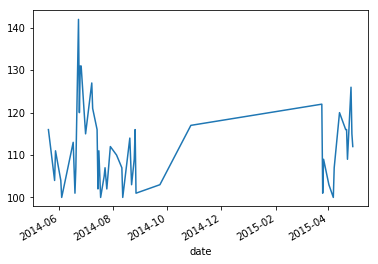

In [308]:
dfdate100.groupby('date')['price'].count().plot()

#### Most houses are sold during the summer. As you can see from the graph a spike in house sold between 2014-06 and 2014-08. While less homes are sold during the end of the year and beginning of the new year.

In [226]:
#descriptive statistics of homes sold in the summer of 2014
dfdate[(dfdate['date'] >= '2014-06') & (dfdate['date'] < '2014-08')].describe()


,price
count,4.391000e+03
mean,5.513488e+05
std,3.679527e+05
min,8.650000e+04
25%,3.280000e+05
50%,4.650000e+05
75%,6.600000e+05
max,7.062500e+06


In [227]:
#descriptive stats of homes other than the summer of 2014
dfdate[(dfdate['date'] >= '2014-08') | (dfdate['date'] < '2014-06')].describe()


,price
count,1.704500e+04
mean,5.377420e+05
std,3.675806e+05
min,7.500000e+04
25%,3.200000e+05
50%,4.499500e+05
75%,6.399500e+05
max,7.700000e+06


In [228]:
551348/537742

1.0253020965444395

In [261]:
dfdate[(dfdate['date'] >= '2014-06') & (dfdate['date'] < '2014-08')].count()

date     4391
price    4391
dtype: int64

In [259]:
dfdate.count()

date     21436
price    21436
dtype: int64

In [262]:
4391/21436 #20 percent of homes were sold during the summer

0.20484232132860608

#### Most homes are sold in the summer at a 2.5% increase on average price compared to homes outside this summer. About 20.5% of homes are sold during the summer.

In [229]:
dfdate.describe()

,price
count,2.143600e+04
mean,5.405293e+05
std,3.676893e+05
min,7.500000e+04
25%,3.221500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


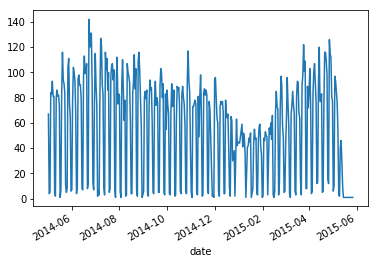

In [240]:
dfdate.groupby('date')['price'].count().plot() #lets take a look at graph again

lets analyze dates between 2014-08 and 2014-12


In [241]:
#dates from summer to end of year (Q3 & Q4)
dfdate[(dfdate['date'] >= '2014-08') & (dfdate['date'] < '2014-12')].describe()


,price
count,6.985000e+03
mean,5.325719e+05
std,3.763152e+05
min,8.200000e+04
25%,3.179500e+05
50%,4.425000e+05
75%,6.329250e+05
max,7.700000e+06


In [242]:
dfdate[(dfdate['date'] < '2014-08') | (dfdate['date'] > '2014-12')].describe()


,price
count,1.435700e+04
mean,5.442088e+05
std,3.633774e+05
min,7.500000e+04
25%,3.250000e+05
50%,4.550000e+05
75%,6.500000e+05
max,7.062500e+06


In [244]:
532571/544208

0.9786166318760474

In [263]:
dfdate[(dfdate['date'] >= '2014-08') & (dfdate['date'] < '2014-12')].count()

date     6985
price    6985
dtype: int64

In [264]:
dfdate.count()

date     21436
price    21436
dtype: int64

In [265]:
6985/21436

0.32585370404926295

#### Home sold between the summer and the end of the year (Q3 & Q4) are sold 3% less on average compared to homes outside this date. About 32.5% of the homes are sold during this time

#### Dates between 2014-06 and 2014-08, around the summer
- have a 2.5% more on average compared to other dates
- 20.5% of homes sold

#### Dates between 2014-12 and 2015-03
- 22% less on average compared to other dates
- 17% of homes sold

#### Dates between 2014-08 and 2014-12, (Q3 & Q4)
- 3% less on average compared to other dates
- 32% of homes sold


lets analyze the data by month

In [321]:
dfdate.head()

,date,price,month
0,2014-10-13,221900.0,10
1,2014-12-09,538000.0,12
2,2015-02-25,180000.0,2
3,2014-12-09,604000.0,12
4,2015-02-18,510000.0,2


Lets group each month to their corresponding season
- Spring runs from March 1 to May 31
- Summer runs from June 1 to August 31
- Fall runs from September 1 to November 30 
- Winter runs from December 1 to February 28

In [326]:
dfdate['season'] = 'Winter'
dfdate.loc[(dfdate['month']>=3) & (dfdate['month'] <=5),'season'] = 'Spring'
dfdate.loc[(dfdate['month']>=6) & (dfdate['month'] <=8),'season'] = 'Summer'
dfdate.loc[(dfdate['month']>=9) & (dfdate['month'] <=11),'season'] = 'Fall'

In [327]:
dfdate.head()

,date,price,month,season
0,2014-10-13,221900.0,10,Fall
1,2014-12-09,538000.0,12,Winter
2,2015-02-25,180000.0,2,Winter
3,2014-12-09,604000.0,12,Winter
4,2015-02-18,510000.0,2,Winter


In [372]:

dfdate.min() #2014-05-02
dfdate.max() #2015-05-27, extra month of data. 
#We should exclude this extra month to get a better representation of year of housing data

dfdate_lessmonth = dfdate[dfdate['date']> '2014-05-27']

Text(0.5,1,'Number of houses sold per season')

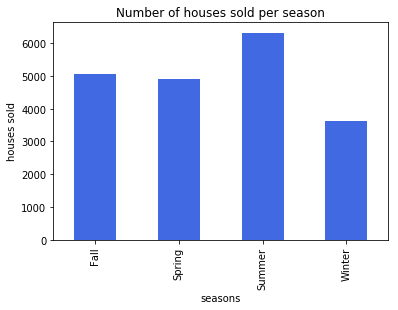

In [368]:
dfdate_lessmonth.groupby('season')['price'].count().plot(kind='bar',color = 'royalblue')
plt.xlabel('seasons')
plt.ylabel('houses sold')
plt.title('Number of houses sold per season')

#### From the graph majority of the homes are sold between Spring and Summer

In [369]:
dfdate_lessmonth.groupby('season')['price'].count()

season
Fall      5048
Spring    4911
Summer    6328
Winter    3638
Name: price, dtype: int64

In [370]:
5048+4911+6328+3638


19925

In [373]:
fallpc= 5048/19925
springpc = 4911/19925
summerpc=6328/19925
winterpc = 3638/19925

print(fallpc)
print(springpc)
print(summerpc)
print(winterpc)

0.25335006273525723
0.24647427854454204
0.3175909661229611
0.18258469259723964


##### Percentage of Homes sold by Season
- around 25% of homes were sold in the Fall
- around 25% of homes were sold in the Spring
- around 32% of homes were sold in the Summer
- around 18% of homes were sold in the Winter


Text(0.5,1,'Number Of Houses Sold per Season')

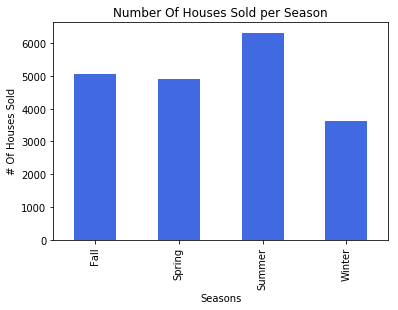

In [375]:
dfdate_lessmonth.groupby('season')['price'].count().plot(kind='bar',color = 'royalblue')
plt.xlabel('Seasons')
plt.ylabel('# Of Houses Sold')
plt.title('Number Of Houses Sold per Season')

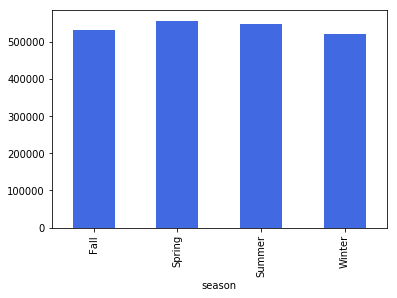

In [380]:
dfdate_lessmonth.groupby('season')['price'].mean().plot(kind='bar',color = 'royalblue')

In [381]:
dfdate_lessmonth.groupby('season')['price'].mean()

season
Fall      531286.790808
Spring    557020.086540
Summer    546626.357459
Winter    519647.979659
Name: price, dtype: float64

In [382]:
dfdate_lessmonth.describe()

,price,month
count,1.992500e+04,19925.000000
mean,5.403760e+05,6.711418
std,3.698570e+05,3.191699
min,7.500000e+04,1.000000
25%,3.210270e+05,4.000000
50%,4.500000e+05,7.000000
75%,6.450000e+05,9.000000
max,7.700000e+06,12.000000


In [383]:
fallpcp= 531286/540376
springpcp = 557020/540376
summerpcp=546626/540376
winterpcp = 519647/540376

print(fallpcp)
print(springpcp)
print(summerpcp)
print(winterpcp)

0.9831783794987194
1.0308007757561402
1.0115660206967
0.9616396731164967


#### Average price per season compared to average price overall
- homes in the Fall were sold ~2% less than average
- homes in the Spring were sold ~3% more than average
- homes in the Summer were sold ~1% more than average
- homes in the Winter were sold ~4% less than average

In [385]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


### Bedrooms

In [406]:
df.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [410]:
df[df.bedrooms ==0].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,No
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,No
3467,1453602309,2014-08-05,288000.0,0,1.5,1430,1650,3.0,0,0,...,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,No
4868,6896300380,2014-10-02,228000.0,0,1.0,390,5900,1.0,0,0,...,390,0,1953,0,98118,47.5260,-122.261,2170,6000,No
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,No


In [422]:
df.bedrooms = df.bedrooms.astype('category')

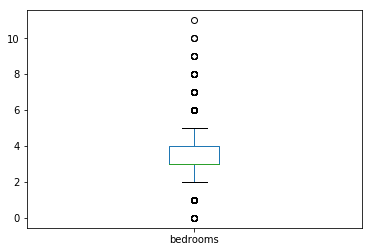

In [424]:
dfbed['bedrooms'].plot(kind='box')

In [425]:
dfbed = df[['bedrooms', 'price']].copy()
dfbed.head()

,bedrooms,price
0,3,221900.0
1,3,538000.0
2,2,180000.0
3,4,604000.0
4,3,510000.0


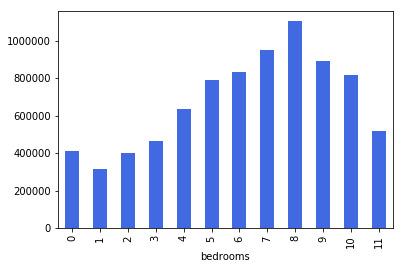

In [427]:
dfbed.groupby('bedrooms')['price'].mean().plot(kind = 'bar',color = 'royalblue')

#### Bedroom mean prices gradually increase from 1 with the highest mean price on 8 bedrooms. 